# Classifing Images of Cats and Dogs

## Convolutional neural network built with Tensorflow


In [0]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

## Download and prepare data

In [0]:
# Set up kaggle credentials
! pip install -U -q kaggle
! mkdir -p ~/.kaggle
! echo '{"username":"asokolov1","key":"3755c7001853a3a4183f904f8af0ca85"}' > ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
# Download data
! kaggle competitions download -c dogs-vs-cats
! unzip train.zip

In [0]:
# Create a dataframe with file names and labels
files = os.listdir('train')

categories = []

for f in files:
    c = f.split('.')[0]
    if c == 'dog':
        categories.append(1)
    else:
        categories.append(0)
        
data = pd.DataFrame({
    'file':files,
    'category':categories
})

data = data[['file','category']]

test,train = train_test_split(data,test_size = 0.75)

In [0]:
# Set variables
img_size = 100

In [0]:
def prepare_data(df):
    '''
    Returns an array of image pixel values and an array of labels
    '''
    x = np.zeros((len(df),img_size,img_size,1))
    y = np.zeros((len(df),2))
    
    for i in range(len(df)):
        img = load_img('train/' + df.iloc[i,0], target_size = (img_size,img_size), color_mode = 'grayscale')
        img = img_to_array(img)
        
        x[i] = img
        y[i,df.iloc[i,1]] = 1
    
    # Normalize pixel values
    x = x/255
                    
    return x,y

In [0]:
xtrain, ytrain = prepare_data(train)
xtest, ytest = prepare_data(test)

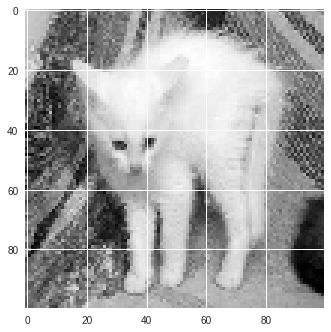

In [9]:
# Display image sample
var = np.reshape(xtrain[10],(img_size,img_size))
plt.imshow(var, cmap = 'gray')

## Construct model

In [0]:
model = Sequential()

model.add(Conv2D(48, (5,5), activation = 'relu', input_shape = (img_size,img_size,1)))

model.add(MaxPooling2D((2,2),(2,2)))

model.add(Conv2D(96,(3,3), activation = 'relu'))

model.add(MaxPooling2D((2,2),(2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu'))

model.add(Flatten())

model.add(Dense(1024, activation = 'relu'))

model.add(Dropout(0.8))

model.add(Dense(512, activation = 'relu'))

model.add(Dropout(0.6))

model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(lr=0.01), metrics = ['accuracy'])

## Train model

In [15]:
model.fit(xtrain, ytrain, epochs = 30, batch_size = 50, validation_data = (xtest,ytest))

Train on 18750 samples, validate on 6250 samples
Epoch 1/30
18750/18750 [==============================] - 35s 2ms/sample - loss: 0.6926 - acc: 0.5144 - val_loss: 0.6879 - val_acc: 0.5931
Epoch 2/30
18750/18750 [==============================] - 35s 2ms/sample - loss: 0.6873 - acc: 0.5452 - val_loss: 0.6778 - val_acc: 0.5669
Epoch 3/30
18750/18750 [==============================] - 35s 2ms/sample - loss: 0.6800 - acc: 0.5697 - val_loss: 0.6739 - val_acc: 0.5723
Epoch 4/30
18750/18750 [==============================] - 35s 2ms/sample - loss: 0.6737 - acc: 0.5783 - val_loss: 0.6684 - val_acc: 0.5848
Epoch 5/30
18750/18750 [==============================] - 35s 2ms/sample - loss: 0.6684 - acc: 0.5914 - val_loss: 0.6550 - val_acc: 0.6109
Epoch 6/30
18750/18750 [==============================] - 35s 2ms/sample - loss: 0.6616 - acc: 0.6044 - val_loss: 0.6416 - val_acc: 0.6354
Epoch 7/30
18750/18750 [==============================] - 35s 2ms/sample - loss: 0.6555 - acc: 0.6128 - val_loss: 0.6

In [17]:
model.evaluate(xtrain,ytrain)

18750/18750 [==============================] - 11s 597us/sample - loss: 0.3219 - acc: 0.8596


[0.321855771633784, 0.85962665]

In [18]:
model.evaluate(xtest,ytest)

6250/6250 [==============================] - 4s 595us/sample - loss: 0.4336 - acc: 0.8010


[0.43360571649551394, 0.80096]

## Display predictions

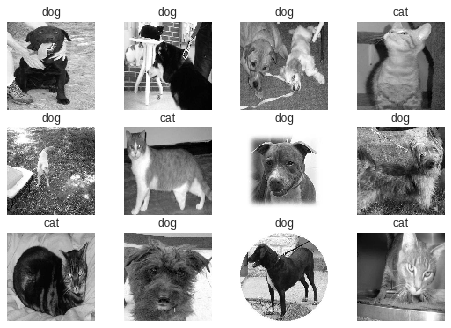

In [22]:
labels = {0:'cat',1:'dog'}
fig = plt.figure()

for img,i in zip(xtest[:12],range(1,13)):
  pred = np.argmax(model.predict([[img]])[0])
  sub = fig.add_subplot(3,4,i)
  sub.imshow(img.reshape(img_size,img_size),cmap = 'gray')
  plt.title(labels[pred])
  
  sub.axes.get_xaxis().set_visible(False)
  sub.axes.get_yaxis().set_visible(False)
  
plt.show()

## Save model

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
model.save('/content/gdrive/My Drive/Notebooks/dog-cat-classifier/dog-cat-cnn.h5')